#Introduction and Purpose

Gross Domestic Product (GDP) is a widely used economic indicator that reflects the overall health of a country’s economy. Recently, GDP has been at the center of discussions on the news about tariffs, the job market, taxes, government deficits, and many other policy topics. While economists may have an expert understanding of GDP, for those of us with only introductory courses in macroeconomics and microeconomics(like myself), it remains a complex and intriguing subject worthy of deeper exploration.

1. For Context, GDP is calculated using the formula: GDP = C + I + G + NX, where:

  *   *C*  = Personal Consumption Expenditures (simplified to Consumer Spending)
  *   *I*  = Gross Private Domestic Investment (simplified to Private Investments)
  *   *G*  = Government Consumption Expenditures and Gross Investment (simlified to Government Spending)
  *   *NX*  = Net Exports (Exports minus Imports)

  For clarity and accessibility, I use the simplified labels throughout the project.

2. This project began with the question: Which component is the biggest driving force of GDP? Additionally, I wanted to explore whether the influence of each component on GDP had changed over time. Have the relative contributions of consumer spending, investment, government spending, and net exports remained constant since 1947, or have they shifted with economic cycles and events?


3. Regarding the data that will be used, the [U.S Bureau of Economic Analysis (BEA)](https://www.bea.gov/) was used to source the data. This United States government agency is responsible for measuring the U.S. economy. On their website, they have a vast amount of tables measuring US GDP in a variety of ways. For this project, [Table 1.1.6.](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*1tkaagy*_ga*MjMyMzIxNjY0LjE3NDg2NTYxNjM.*_ga_J4698JNNFT*czE3NTEwNzgzOTckbzckZzEkdDE3NTEwNzg0MDUkajUyJGwwJGgw#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDNdLCJkYXRhIjpbWyJjYXRlZ29yaWVzIiwiU3VydmV5Il0sWyJOSVBBX1RhYmxlX0xpc3QiLCI2Il1dfQ==) was used which measures US GDP in Billions of chained (2017) US dollars to account for inflation. As stated before, the dataset ranges from Q1 of 1947 to Q1 of 2025. The BEA has an api that could be called to get the tables, however the api was difficult for use and was not the focus of this data science project.

4. The goals of this analysis are:

  *   To explore the historical contributions of each GDP component.
  *   To identify the trends and shifts of GDP components over time.
  *   To build and evaluate a machine learning model to forecast GDP for the next 8 quarters.

5. Through this project, I aim to make GDP analysis more approachable for a broad audience, while developing and demonstrating practical skills in economic data analysis, visualization, and forecasting.








##1. Importing Dataset

In [1]:
#Importing all the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
#Reading in the dataset
df_raw = pd.read_csv('/content/GDP Data from 1947 to 2025.csv')
df_raw.head()

,"Table 1.1.6. Real Gross Domestic Product, Chained Dollars",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314
0,"Table 1.1.6. Real Gross Domestic Product, Chai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Last Revised on: May 29, 2025 - Next Release D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Line,NaN,1947,1947,1947,1947,1948,1948,1948,1948,...,2022,2023,2023,2023,2023,2024,2024,2024,2024,2025
3,Line,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,...,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1
4,1,Gross domestic product,2182.7,2176.9,2172.4,2206.5,2239.7,2276.7,2289.8,2292.4,...,22249.5,22403.4,22539.4,22780.9,22960.6,23053.5,23223.9,23400.3,23542.3,23528


##2. Data Preprocessing

In [3]:
#Dropping the 1st and 2nd rows and the 1st column
df_raw = df_raw.iloc[2:, 1:].reset_index(drop = True)
df_raw.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314
0,NaN,1947,1947,1947,1947,1948,1948,1948,1948,1949,...,2022,2023,2023,2023,2023,2024,2024,2024,2024,2025
1,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,...,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1
2,Gross domestic product,2182.7,2176.9,2172.4,2206.5,2239.7,2276.7,2289.8,2292.4,2260.8,...,22249.5,22403.4,22539.4,22780.9,22960.6,23053.5,23223.9,23400.3,23542.3,23528
3,Personal consumption expenditures,1351.4,1373.9,1378.4,1378.8,1385.7,1401.8,1403.9,1415.1,1417.4,...,15324,15510.2,15548.5,15646.7,15781.4,15856.9,15967.3,16113,16273.2,16321.1
4,Goods,---,---,---,---,---,---,---,---,---,...,5200,5293.5,5288.9,5334.1,5378.5,5362.8,5402.1,5476.7,5560.1,5561.1


In [4]:
#Transposing the data set to go from long format to wide format (90 degree pivot)
df_transposed = df_raw.T
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Unnamed: 1,NaN,NaN,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Residual,NaN,NaN,NaN
Unnamed: 2,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,560.5,---,---,---,---,3.6,NaN,NaN,NaN
Unnamed: 3,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,560.1,---,---,---,---,-4.6,NaN,NaN,NaN
Unnamed: 4,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,560,---,---,---,---,-8.8,NaN,NaN,NaN
Unnamed: 5,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,555.6,---,---,---,---,2.4,NaN,NaN,NaN


In [5]:
#Reseting the index after transposing
df_transposed = df_transposed.reset_index()
df_transposed.head()

,index,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,Unnamed: 1,NaN,NaN,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,...,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Residual,NaN,NaN,NaN
1,Unnamed: 2,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,...,---,560.5,---,---,---,---,3.6,NaN,NaN,NaN
2,Unnamed: 3,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,...,---,560.1,---,---,---,---,-4.6,NaN,NaN,NaN
3,Unnamed: 4,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,...,---,560,---,---,---,---,-8.8,NaN,NaN,NaN
4,Unnamed: 5,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,...,---,555.6,---,---,---,---,2.4,NaN,NaN,NaN


In [6]:
#delete the Unnamed: 1 column that servers no purpose
df_transposed = df_transposed.iloc[:, 1:]
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,NaN,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Residual,NaN,NaN,NaN
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,560.5,---,---,---,---,3.6,NaN,NaN,NaN
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,560.1,---,---,---,---,-4.6,NaN,NaN,NaN
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,560,---,---,---,---,-8.8,NaN,NaN,NaN
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,555.6,---,---,---,---,2.4,NaN,NaN,NaN


In [7]:
#delete the last 3 columns that servers no purpose
df_transposed = df_transposed.iloc[:, :-3]
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,NaN,NaN,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Services,Imports,Goods,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Residual
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,53.9,---,---,560.5,---,---,---,---,3.6
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,54.9,---,---,560.1,---,---,---,---,-4.6
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,48.7,---,---,560,---,---,---,---,-8.8
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,51.3,---,---,555.6,---,---,---,---,2.4


In [8]:
df_transposed.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      dtype='object')

In [9]:
#The new columns names that will be used to replace the old numbered columns
column_names = [
    'Year',
    'Quarter',
    'Gross domestic product',
    'Personal consumption expenditures',
    'Goods',
    'Durable goods',
    'Nondurable goods',
    'Services',
    'Gross private domestic investment',
    'Fixed investment',
    'Nonresidential',
    'Structures',
    'Equipment',
    'Intellectual property products',
    'Residential',
    'Change in private inventories',
    'Net exports of goods and services',
    'Exports',
    'Exports_Goods',
    'Exports_Services',
    'Imports',
    'Imports_Goods',
    'Imports_Services',
    'Government consumption expenditures and gross investment',
    'Federal',
    'National defense',
    'Nondefense',
    'State and local',
    'Residual'
]


In [10]:
#Renaming of columns
df_transposed.columns = column_names
df_transposed.head()

,Year,Quarter,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Exports_Services,Imports,Imports_Goods,Imports_Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Residual
0,NaN,NaN,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Services,Imports,Goods,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Residual
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,53.9,---,---,560.5,---,---,---,---,3.6
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,54.9,---,---,560.1,---,---,---,---,-4.6
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,48.7,---,---,560,---,---,---,---,-8.8
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,51.3,---,---,555.6,---,---,---,---,2.4


In [11]:
#Removing the first row that used to be the index of the data
df_transposed.drop(index = 0, inplace = True)
df_transposed.head()

,Year,Quarter,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Exports_Services,Imports,Imports_Goods,Imports_Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Residual
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,53.9,---,---,560.5,---,---,---,---,3.6
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,54.9,---,---,560.1,---,---,---,---,-4.6
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,48.7,---,---,560,---,---,---,---,-8.8
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,51.3,---,---,555.6,---,---,---,---,2.4
5,1948,Q1,2239.7,1385.7,---,---,---,---,268,---,...,---,57.9,---,---,563.9,---,---,---,---,5.6


In [12]:
#Creating a Period column
df_transposed['Period'] = df_transposed['Year'].astype(str) + '-' + df_transposed['Quarter']
df_transposed.head()

,Year,Quarter,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Imports,Imports_Goods,Imports_Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Residual,Period
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,53.9,---,---,560.5,---,---,---,---,3.6,1947-Q1
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,54.9,---,---,560.1,---,---,---,---,-4.6,1947-Q2
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,48.7,---,---,560,---,---,---,---,-8.8,1947-Q3
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,51.3,---,---,555.6,---,---,---,---,2.4,1947-Q4
5,1948,Q1,2239.7,1385.7,---,---,---,---,268,---,...,57.9,---,---,563.9,---,---,---,---,5.6,1948-Q1


In [13]:
#Use the Period column to create a Data column
df_transposed['Date'] = pd.PeriodIndex(df_transposed['Period'], freq='Q').to_timestamp()
df_transposed.head()

,Year,Quarter,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,...,Imports_Goods,Imports_Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Residual,Period,Date
1,1947,Q1,2182.7,1351.4,---,---,---,---,227.2,---,...,---,---,560.5,---,---,---,---,3.6,1947-Q1,1947-01-01
2,1947,Q2,2176.9,1373.9,---,---,---,---,209.8,---,...,---,---,560.1,---,---,---,---,-4.6,1947-Q2,1947-04-01
3,1947,Q3,2172.4,1378.4,---,---,---,---,203.7,---,...,---,---,560,---,---,---,---,-8.8,1947-Q3,1947-07-01
4,1947,Q4,2206.5,1378.8,---,---,---,---,243.1,---,...,---,---,555.6,---,---,---,---,2.4,1947-Q4,1947-10-01
5,1948,Q1,2239.7,1385.7,---,---,---,---,268,---,...,---,---,563.9,---,---,---,---,5.6,1948-Q1,1948-01-01


In [14]:
#Setting the index of the rows to be based on the created Date column
df_transposed = df_transposed.set_index('Date')
#dropping redundant columns
df_transposed = df_transposed.drop(columns = ['Year', 'Quarter', 'Period'])
df_transposed.head()

,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Exports_Services,Imports,Imports_Goods,Imports_Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Residual
Date,,,,,,,,,,,,,,,,,,,,,
1947-01-01,2182.7,1351.4,---,---,---,---,227.2,---,---,---,...,---,53.9,---,---,560.5,---,---,---,---,3.6
1947-04-01,2176.9,1373.9,---,---,---,---,209.8,---,---,---,...,---,54.9,---,---,560.1,---,---,---,---,-4.6
1947-07-01,2172.4,1378.4,---,---,---,---,203.7,---,---,---,...,---,48.7,---,---,560,---,---,---,---,-8.8
1947-10-01,2206.5,1378.8,---,---,---,---,243.1,---,---,---,...,---,51.3,---,---,555.6,---,---,---,---,2.4
1948-01-01,2239.7,1385.7,---,---,---,---,268,---,---,---,...,---,57.9,---,---,563.9,---,---,---,---,5.6


In [15]:
#Checking to see what are the data types in the dataset
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313 entries, 1947-01-01 to 2025-01-01
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Gross domestic product                                    313 non-null    object
 1   Personal consumption expenditures                         313 non-null    object
 2   Goods                                                     313 non-null    object
 3   Durable goods                                             313 non-null    object
 4   Nondurable goods                                          313 non-null    object
 5   Services                                                  313 non-null    object
 6   Gross private domestic investment                         313 non-null    object
 7   Fixed investment                                          313 non-null    object
 8   Nonresident

In [16]:
#Dropping unnecessary columns that will not be used for the project
df_transposed = df_transposed.drop(columns = ['Goods', 'Durable goods', 'Nondurable goods',
                                              'Services', 'Fixed investment', 'Nonresidential',
                                              'Structures', 'Equipment','Intellectual property products',
                                              'Residential', 'Change in private inventories',
                                              'Exports_Goods', 'Exports_Services', 'Imports_Goods', 'Imports_Services',
                                              'Federal', 'National defense', 'Nondefense', 'State and local', 'Residual',
                                              'Net exports of goods and services'], axis = 1)
df_transposed.head()

,Gross domestic product,Personal consumption expenditures,Gross private domestic investment,Exports,Imports,Government consumption expenditures and gross investment
Date,,,,,,
1947-01-01,2182.7,1351.4,227.2,93.8,53.9,560.5
1947-04-01,2176.9,1373.9,209.8,92.6,54.9,560.1
1947-07-01,2172.4,1378.4,203.7,87.9,48.7,560
1947-10-01,2206.5,1378.8,243.1,77.9,51.3,555.6
1948-01-01,2239.7,1385.7,268,74.4,57.9,563.9


In [17]:
#Renaming of columns from official name to preferred name
df_transposed = df_transposed.rename(columns = {'Gross domestic product': 'GDP', 'Personal consumption expenditures': 'Consumer_Spending',
                                                'Gross private domestic investment': 'Private_Investment',
                                                'Government consumption expenditures and gross investment':'Government_Spending'})
df_transposed.head()

,GDP,Consumer_Spending,Private_Investment,Exports,Imports,Government_Spending
Date,,,,,,
1947-01-01,2182.7,1351.4,227.2,93.8,53.9,560.5
1947-04-01,2176.9,1373.9,209.8,92.6,54.9,560.1
1947-07-01,2172.4,1378.4,203.7,87.9,48.7,560
1947-10-01,2206.5,1378.8,243.1,77.9,51.3,555.6
1948-01-01,2239.7,1385.7,268,74.4,57.9,563.9


In [18]:
#Chaning the data type of the dataset to be float to reflect the dollar nature of the data
df_transposed = df_transposed.astype(float)

In [19]:
#Creating the Net Export column from subtracting the values of the Import column from the Export column
df_transposed['Net_Exports'] = df_transposed['Exports'] - df_transposed['Imports']
#dropping the Export and Import columns
df_clean = df_transposed.drop(columns = ['Exports', 'Imports'])
df_clean.head()

,GDP,Consumer_Spending,Private_Investment,Government_Spending,Net_Exports
Date,,,,,
1947-01-01,2182.7,1351.4,227.2,560.5,39.9
1947-04-01,2176.9,1373.9,209.8,560.1,37.7
1947-07-01,2172.4,1378.4,203.7,560.0,39.2
1947-10-01,2206.5,1378.8,243.1,555.6,26.6
1948-01-01,2239.7,1385.7,268.0,563.9,16.5


In [20]:
#Quick glance to see data types, number of columns and rows, making sure index is the data, and checking to see if there are any nulls
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313 entries, 1947-01-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDP                  313 non-null    float64
 1   Consumer_Spending    313 non-null    float64
 2   Private_Investment   313 non-null    float64
 3   Government_Spending  313 non-null    float64
 4   Net_Exports          313 non-null    float64
dtypes: float64(5)
memory usage: 14.7 KB


##2. Exploratory Data Analysis

In [21]:
#Quick glance at the statistics of the dataset
df_clean.describe()

,GDP,Consumer_Spending,Private_Investment,Government_Spending,Net_Exports
count,313.000000,313.000000,313.000000,313.000000,313.000000
mean,10190.310543,6662.569649,1553.594249,2263.164856,-224.366134
std,6248.942666,4343.457699,1196.008317,949.779563,290.383427
min,2172.400000,1351.400000,201.900000,555.600000,-1379.000000
25%,4788.300000,2844.200000,573.400000,1559.300000,-394.900000
50%,8749.100000,5531.800000,1191.000000,2243.500000,-68.800000
75%,16047.600000,10745.900000,2434.500000,3230.400000,-18.200000
max,23542.300000,16321.100000,4556.800000,3996.300000,50.200000


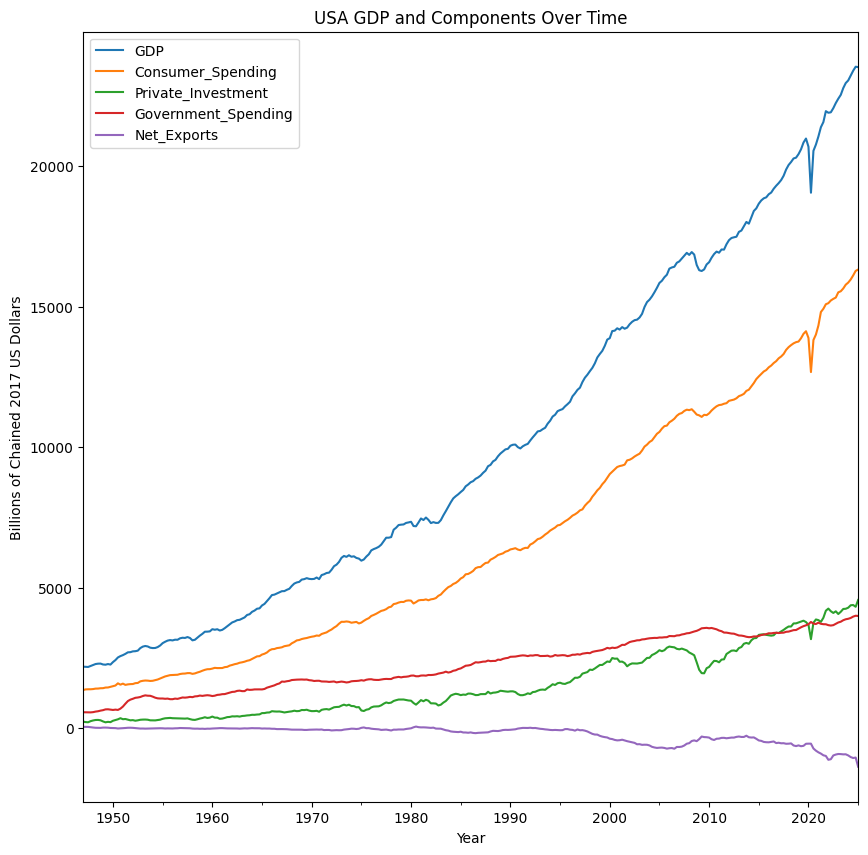

In [22]:
#Time Series Line chart showing gdp and components over time
df_clean.plot(y = ['GDP', 'Consumer_Spending', 'Private_Investment',
                   'Government_Spending', 'Net_Exports'], figsize=(10,10))
plt.title('USA GDP and Components Over Time')
plt.ylabel('Billions of Chained 2017 US Dollars')
plt.xlabel('Year')
plt.legend(loc = 'upper left')
plt.show;

Time Series Line chart observations:
1. Government spending has shown a consistent upward trend since World War II, increasing from approximately 556 billion in 1947 to over $3.9 trillion in 2025 (chained 2017 USD). This persistent growth reflects the cumulative impact of multiple conflicts (such as the Korean and Vietnam Wars, the Cold War, Afghanistan, and Iraq), the expansion of social programs, and repeated fiscal stimulus during economic downturns. Notably, government spending tends to rise during recessions, acting as an automatic stabilizer to support the economy.
2. Net exports have exhibited a sustained negative trend, particularly after 1995, indicating that imports have increasingly outpaced exports. This pattern may be attributed to factors such as the offshoring of American manufacturing, the dominance of imported goods (especially from China), and trade agreements like the North American Free Trade Agreement (NAFTA) that have facilitated globalization.
3. The line representing consumer spending closely mirrors the GDP line itself, underscoring the strong influence of consumer expenditures on overall economic output. This visual similarity highlights that consumer spending is the primary driver of US GDP.
4. Significant dips in both the GDP and consumer spending lines are evident during the 2007–2009 Great Recession and the 2020 pandemic. These periods of economic uncertainty led private consumers to reduce both spending and investment, which is reflected in the pronounced declines seen in private investment during these times.
5. The private investment component is notably volatile, with frequent and sometimes sharp fluctuations. This volatility suggests that private investment is highly sensitive to economic cycles and external shocks.
6. Over the long term, GDP has grown in an exponential fashion. No clear cyclical patterns are immediately visible in the chart, indicating the need for further analysis—such as decomposition or technical indicators—to investigate possible cycles or periodicity in economic growth.

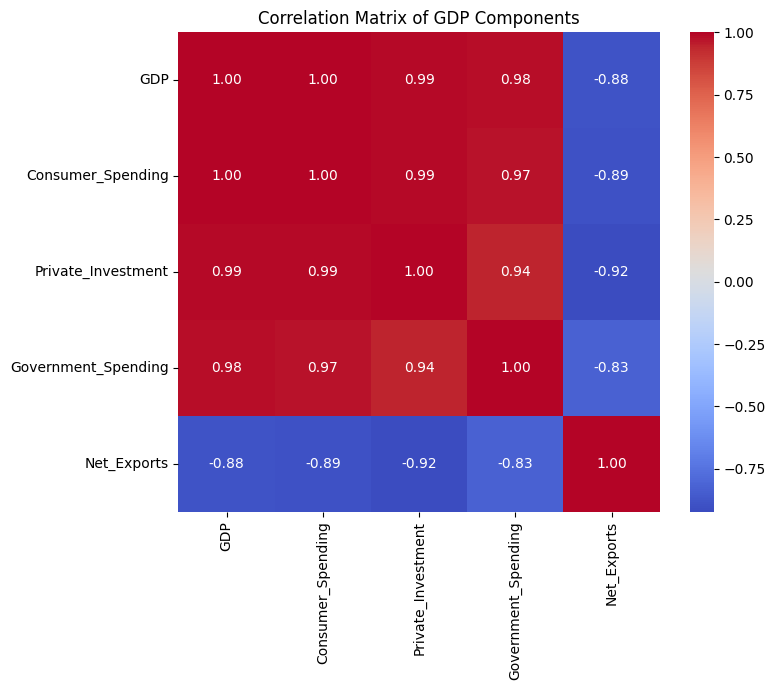

In [23]:
#Correlation Heatmap
plt.figure(figsize = (8,7))
corr = df_clean.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of GDP Components')
plt.tight_layout()
plt.show();

Correlation Heatmap Observations:
1. Consumer spending is perfectly correlated with GDP (correlation value of 1.00), which is expected since it constitutes the largest share of GDP.
2. GDP. Private investment and government spending also show very high correlations with GDP, at 0.99 and 0.98 respectively, though not as high as consumer spending.
3. Net exports, by contrast, are negatively correlated with GDP (correlation of -0.88), reflecting their inverse relationship with overall economic growth.
4. A key issue revealed by the heatmap is the presence of strong multicollinearity among the GDP components. This is a direct result of the GDP formula itself—GDP is defined as the sum of private investment, government spending, consumer spending, and net exports. Because of this mathematical relationship, the components are not independent, which violates a core assumption of regression analysis and makes reliable coefficient estimation impossible. To further assess the severity of multicollinearity among the independent variables, it would be necessary to calculate the Variance Inflation Factor (VIF) before considering any regression modeling.

In [24]:
#Variance Inflation Factor (Visualizing Multicollinearity)
vif_data = pd.DataFrame()
vif_data['Features'] = df_clean.columns
vif_data['VIF'] = [variance_inflation_factor(df_clean.values, i) for i in range(df_clean.shape[1])]
vif_data

,Features,VIF
0,GDP,51974.591645
1,Consumer_Spending,26692.353964
2,Private_Investment,1531.720862
3,Government_Spending,1510.343224
4,Net_Exports,71.737668


Why not choose a regression model to pair with the forecast model?
1. In statistics, the Variance Inflation Factor (VIF) is used to measure multicollinearity:
 *    VIF = 1: No multicollinearity
 *    VIF > 4: Multicollinearity might exist and requires further testing
 *    VIF > 10: Multicollinearity is serious and should be addressed
2. In this case, the VIF values for the GDP components are well above 10, confirming severe multicollinearity.
3. This makes sense because GDP is mathematically defined as the sum of its components:
 *   GDP = Consumer Spending + Private Spending + Government Spending + Net Exports

4. This perfect linear relationship means the independent variables are so closely related that a regression model cannot separate their individual effects, making any regression results unreliable and meaningless.
5. Therefore, a regression model can not be used for this project and only a forecast model will be used.


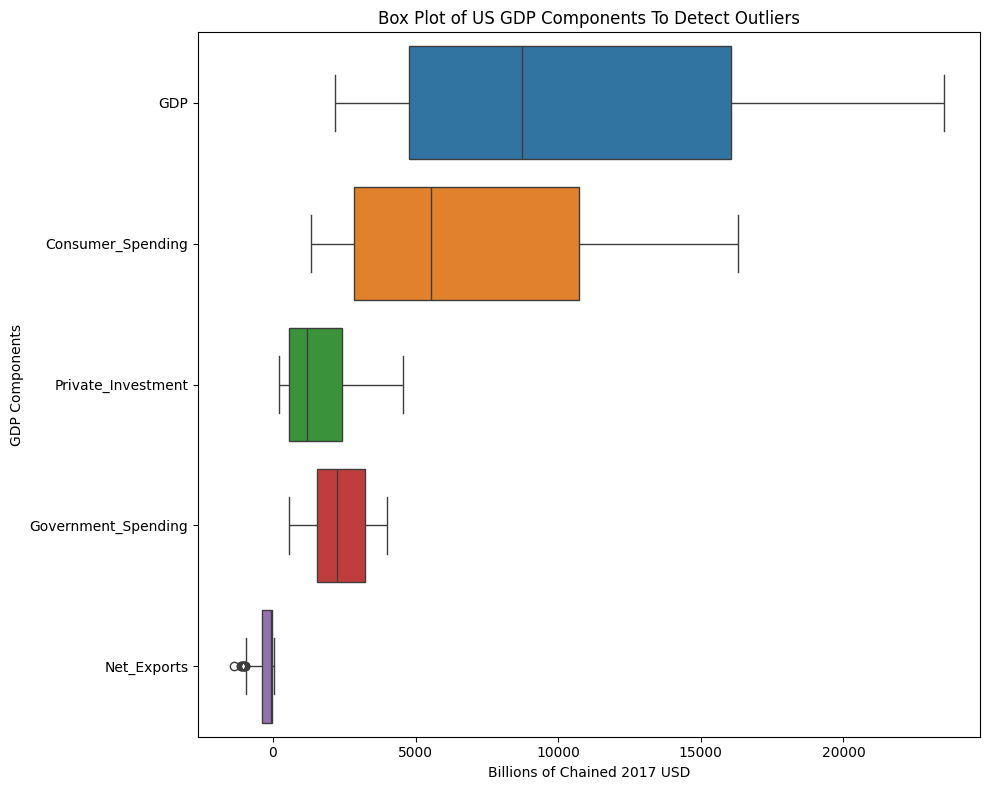

In [25]:
#Boxplot for detecting outliers
plt.figure(figsize = (10,8))
sns.boxplot(data = df_clean, orient = 'h')
plt.title('Box Plot of US GDP Components To Detect Outliers')
plt.xlabel('Billions of Chained 2017 USD')
plt.ylabel('GDP Components')
plt.tight_layout()
plt.show();

Boxplot Distribution observations:
1. The main purpose of this boxplot was to visually identify outliers in the GDP and GDP components data. The plot reveals that Net Exports is the only component with significant outliers, all on the negative side. These negative outliers reflect quarters with unusually large trade deficits, which align with periods of steep decline in Net Exports seen in the line graph. This trend may align with major booms or dips in the US economy or significant policy changes.
2. As for the other GDP components, no outliers were shown in the box plot diagram.


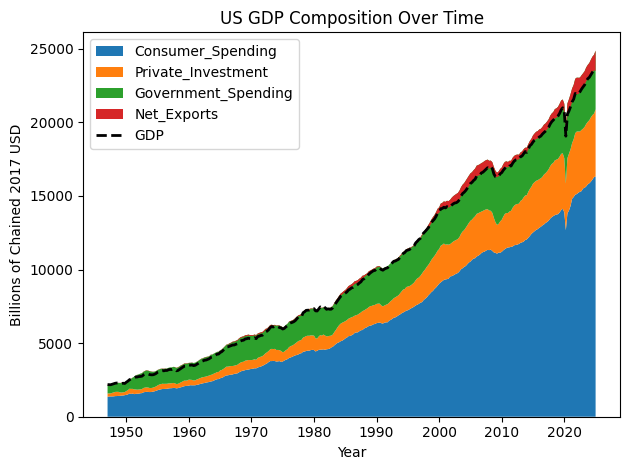

In [26]:
#Stacked area chart illustrating how each GDP component has contributed to the overall GDP over time
components = ['Consumer_Spending', 'Private_Investment', 'Government_Spending', 'Net_Exports']
plt.stackplot(df_clean.index, df_clean[components].T.values, labels = components)
plt.plot(df_clean.index, df_clean['GDP'], linestyle = 'dashed' , linewidth = 2, label = 'GDP', color = 'black')
plt.title('US GDP Composition Over Time')
plt.ylabel('Billions of Chained 2017 USD')
plt.xlabel('Year')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show();

GDP Stack Area Chart Observations
1. Consumer Spending has consistently been the primary contributor to US GDP, and its absolute value has grown substantially over the years. This highlights the central role of consumer activity in driving the American economy.
2. The thickness of the Private Investment area has increased noticeably since 1947, especially after 1990. This trend may reflect greater participation by individuals in investment vehicles such as stocks and bonds, as well as the economic expansion and policy changes during the 1990s, including the Clinton administration’s era of prosperity.
3. While Government Spending has increased over time, its growth has been less dramatic compared to private investment and especially consumer spending. This suggests that, although government expenditures play a significant role, their relative contribution to total GDP has not surged as markedly.
4. Net Exports remained relatively stable in the GDP calculation until the mid-1990s, after which it became predominantly negative. This shift may be associated with new trade policies and the rise of China as a major exporter, as well as increased globalization and offshoring of US manufacturing.

In [27]:
# Percent change in component share over time
start_date = df_clean.index.min()
end_date = df_clean.index.max()
for i in components:
  start_share = (df_clean.loc[start_date, i]) / (df_clean.loc[start_date, 'GDP']) * 100
  end_share = (df_clean.loc[end_date,i]) / (df_clean.loc[end_date, 'GDP']) * 100
  print(f"{i.replace('_', ' ')} share: {start_share:.2f}% to {end_share:.2f}%")

Consumer Spending share: 61.91% to 69.37%
Private Investment share: 10.41% to 19.37%
Government Spending share: 25.68% to 16.96%
Net Exports share: 1.83% to -5.86%


Change in Component Share Over Time Observations(continuation of stackplot)
1. Consumer Spending increased its share of US GDP by 7.46 percentage points from 1947 to 2025. Throughout this period, Consumer Spending consistently made up well over 60% of US GDP.
2. Private Investment saw the largest increase in share, rising by 8.96 percentage points over the same period.
3. Government Spending decreased its share of GDP by 8.72 percentage points since 1947, contrary to the common perception that government spending is always rising as a share of the economy.
4. Net Exports decreased by 4.03 percentage points in its contribution to GDP, moving further into negative territory. This aligns with the visual trend seen in the time series and stack plot, reflecting persistent trade deficits and global economic shifts since the mid-1990s.

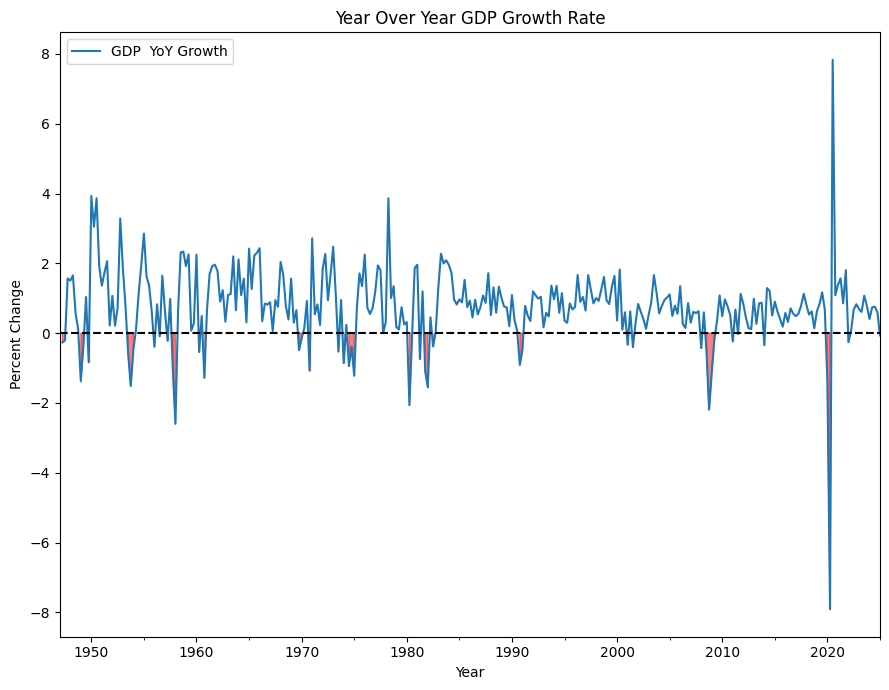

In [28]:
#Year Over Year GDP Growth Rate Line Chart
gdp_yoy = df_clean['GDP'].pct_change()*100
plt.figure(figsize=(9,7))
gdp_yoy.plot(label = 'GDP  YoY Growth')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.fill_between(gdp_yoy.index, gdp_yoy, 0, where=(gdp_yoy <0), color = 'red', alpha = 0.5)
plt.title('Year Over Year GDP Growth Rate')
plt.ylabel('Percent Change')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show();

Year Over Year Growth Line Observation
1. The longest period of positive GDP growth in the United States occurred from the early 1990s to the early 2000s. This sustained expansion was driven by the rise of the internet and telecommunications, lower inflation, and the acceleration of globalization. The expansion ended with the burst of the dot-com bubble and the uncertainty following the 9/11 attacks.
2. Recessions are inevitable, but their duration is much shorter than that of positive economic trends. As seen in the line graph, periods where government spending rises while consumer spending falls often coincide with recessions. During these times, the government injects stimulus into the economy to stabilize conditions and encourage consumer spending.
3. After each recession, there is typically a period of strong economic growth. This pattern is especially pronounced after the 2020 COVID-19 recession, where the following year saw an unprecedented economic boom that quickly returned to average growth levels.
4. Since the early 1980s, the YoY GDP percent change has followed a gradual downward trend, indicating slower average growth in more recent decades.
5. The 2020 recession was the most severe since 1947, with GDP decreasing by almost 8%. This was followed by a rapid rebound of nearly 8% growth. The extreme volatility is attributable to the swift impact of the COVID-19 pandemic, global efforts to restore supply chains, and large-scale public health measures like vaccine rollout. Compared to previous recessions and recoveries, 2020 stands out as the most volatile period in the data.

##3. Forecasting The Next 8 Quarters


In [29]:
#Extracting the GDP values for analysis
gdp_series = df_clean['GDP']
gdp_series.head()

,GDP
Date,
1947-01-01,2182.7
1947-04-01,2176.9
1947-07-01,2172.4
1947-10-01,2206.5
1948-01-01,2239.7


In [30]:
#Splitting the data into train/test datasets
train = gdp_series.iloc[:-8]
test = gdp_series.iloc[-8:]

In [31]:
#Fitting the ARIMA model from the statsmodels library
arima_model = ARIMA(train, order = (2,2,2))
results = arima_model.fit()
print(results.summary());

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  305
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1948.224
Date:                Sun, 29 Jun 2025   AIC                           3906.448
Time:                        00:14:47   BIC                           3925.016
Sample:                    01-01-1947   HQIC                          3913.876
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7405      0.194      3.824      0.000       0.361       1.120
ar.L2          0.0930      0.058      1.598      0.110      -0.021       0.207
ma.L1         -1.8717      0.206     -9.077      0.0

In [32]:
#Forecasting the Next 8 Quarters
forecast = results.get_forecast(steps = 8)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int(alpha = 0.05)
last_date = gdp_series.index[-1]
forecast_dates = pd.date_range(start = pd.to_datetime(last_date) + pd.DateOffset(months = 3), periods = 8, freq = 'QE')

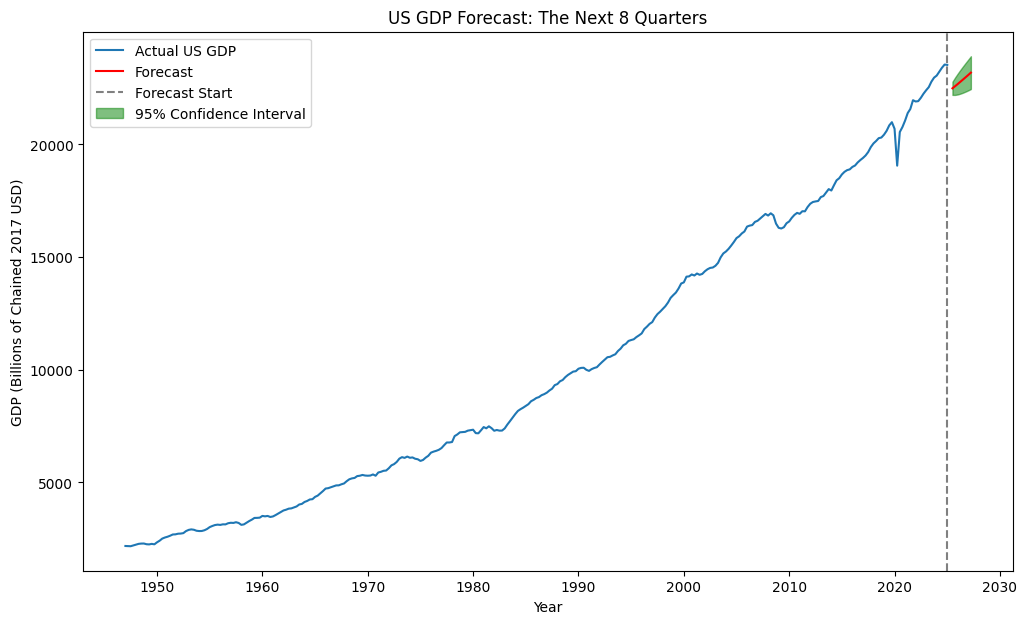

In [33]:
#Visualizing the Forecast
plt.figure(figsize = (12,7))
plt.plot(gdp_series.index, gdp_series, label = 'Actual US GDP')
plt.plot(forecast_dates, forecast_mean, 'r' ,label = 'Forecast')
plt.axvline(gdp_series.index[-1], color = 'grey', linestyle = 'dashed',
            label = 'Forecast Start')
plt.fill_between(forecast_dates, confidence_interval.iloc[:,0], confidence_interval.iloc[:,1], color = 'green', alpha = 0.5,
                 label = '95% Confidence Interval')
plt.title('US GDP Forecast: The Next 8 Quarters')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of Chained 2017 USD)')
plt.legend()
plt.show();

In [34]:
#Forecast table of the next 8 quarters
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_mean})
forecast_df = forecast_df.set_index('Date')
print(forecast_df)

                Forecast
Date                    
2025-06-30  22487.871334
2025-09-30  22582.850461
2025-12-31  22679.152337
2026-03-31  22777.411280
2026-06-30  22877.242572
2026-09-30  22978.420320
2026-12-31  23080.741452
2027-03-31  23184.034569


In [35]:
#ARIMA Model Evaluation
#Using Mean squared error, mean absolute error, mean absolute percentage error, and root mean squared error
y_true = test.values
y_pred = forecast_mean.values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred) *100
#Calculate Mean Absolute Squared Error
naive_mae = np.mean(np.abs(y_true - np.roll(y_true, 1))[1:])
mase = (mae / naive_mae)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse: .2f}')
print(f'Root Mean Squared Error: {rmse: .2f}')
print(f'Mean Absolute Percentage Error: {mape: .2f}')
print(f'Mean Absolute Scaled Error: {mase: .2f}')

Mean Absolute Error: 297.65
Mean Squared Error:  103352.37
Root Mean Squared Error:  321.48
Mean Absolute Percentage Error:  1.28
Mean Absolute Scaled Error:  2.05


Interpretation of Metrics
1. On average, the ARIMA model’s forecasts deviate from the actual GDP values by 297.65 billion per quarter. This value represents the typical size of the model’s errors in the same units as the data, making it easy to interpret the magnitude of forecast inaccuracies.
2. The root mean squared error, which is more sensitive to outliers than the mean absolute error, is calculated at 321.48 billion per quarter. This higher value, compared to the MAE, reflects the model’s tendency to penalize larger errors more heavily, such as those caused by economic shocks like recessions or booms. The difference of nearly 24 billion between the RMSE and MAE highlights this sensitivity to extreme values.
3. The mean absolute percentage error shows that, on average, the ARIMA model’s predictions are 1.28% away from the actual GDP values. This metric provides an intuitive measure of accuracy, making it easy to compare performance across different periods or datasets.
4. The mean absolute scaled error compares the ARIMA model’s accuracy to that of a simple naive forecast. In this case, a MASE value of 2.05 indicates that the ARIMA model performed worse than the naive approach, with average errors more than twice as large. This result could be due to the small dataset, which can make models more prone to overfitting and more sensitive to outliers, while naive models often perform better on small datasets because of their simplicity and low variance. It is also possible that model selection played a role, and that alternative models such as Facebook’s Prophet (which is more robust in handling shocks like recessions and booms) or more advanced techniques might yield improved results.


## Conclusion and Future Steps
1. This project set out to forecast US GDP and analyze the changing influence of its core components over time. The analysis found that consumer spending consistently made up over 60% of US GDP, confirming its dominant role in the economy. Net exports have trended toward negative growth, reflecting their sensitivity to changes in economic policy and the rise of global economic powers. Personal investments exhibited the greatest change since 1947, indicating that US consumers have become increasingly active in allocating funds to long-term investments such as stocks and bonds.
2. The ARIMA model provided reasonable predictive accuracy, with a MAPE of 1.28%. However, its performance was outpaced by a naive forecast, as indicated by a MASE of 2.05. This highlights the challenges of modeling economic data that contains structural shocks and is limited in size. These results suggest that while traditional time series models like ARIMA can capture broad trends, they may struggle to adapt to volatility and sudden economic changes.
3. For future steps, I recommend exploring more robust forecasting models. Approaches such as Facebook’s Prophet, LSTM, and XGBoost have been shown to better handle fluctuations and complex patterns in datasets like GDP. Additionally, expanding the dataset or using a longer time period could improve model performance. With only 313 data points, ARIMA struggled, and the naive model—which tends to perform better with smaller datasets due to its simplicity—outperformed it
4. Overall, this project was a valuable learning experience. I gained practical skills in data manipulation, such as transposing datasets with Pandas and NumPy, and learned to create stacked area and year-over-year plots, which are vital for economic analysis. Addressing multicollinearity using the Variance Inflation Factor gave me hands-on insight into a concept I had previously only encountered in theory. Implementing an ARIMA model for the first time allowed me to experiment with its parameters and understand the importance of model selection. In the future, I hope to further refine my forecasting techniques and achieve better performance compared to simple baselines. Ultimately, this project deepened my understanding of GDP and the challenges of economic forecasting, and provided a strong foundation for more advanced analyses.

Thank you.